# 📊 Airbnb Open Data - Exploratory Data Analysis (EDA)
This notebook loads the Airbnb dataset, cleans it, and generates multiple visualizations to understand pricing, room types, and availability trends.

In [1]:
# This cell loads the Excel file with all sheets and prints heads to understand structure.
import pandas as pd

# Update your file path here
file_path = '/content/1730285881-Airbnb_Open_Data.xlsx'
def read_all_sheets_from_excel(file_path):
    xls = pd.ExcelFile(file_path)
    dataframes = {sheet_name: xls.parse(sheet_name) for sheet_name in xls.sheet_names}
    return dataframes

dataframes = read_all_sheets_from_excel(file_path)
for k, v in dataframes.items():
    print('dataframe: ' + k)
    print(v.head(15))

print('Loaded sheets and displayed heads')

dataframe: in
         id                                              NAME      host id  \
0   1001254                Clean & quiet apt home by the park  80014485718   
1   1002102                             Skylit Midtown Castle  52335172823   
2   1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3   1002755                                               NaN  85098326012   
4   1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5   1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
6   1004650                                   BlissArtsSpace!  61300605564   
7   1005202                                   BlissArtsSpace!  90821839709   
8   1005754                   Large Furnished Room Near B'way  79384379533   
9   1006307                Cozy Clean Guest Room - Family Apt  75527839483   
10  1006859                Cute & Cozy Lower East Side 1 bdrm   1280143094   
11  1007411                  Beautiful 1br on Uppe

In [2]:
# Quick EDA setup: normalize columns, parse dates, basic cleaning, then show head and summary. Then create 5 key visualizations.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the loaded sheet from previous cell via the helper output: it's labeled 'in'
df = dataframes.get('in').copy()

# Standardize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

# Coerce types
num_cols = ['lat','long','price','service_fee','minimum_nights','number_of_reviews','reviews_per_month','review_rate_number','calculated_host_listings_count','availability_365','construction_year']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Derive helpful columns
if 'price' in df.columns and 'service_fee' in df.columns:
    df['total_price'] = df['price'] + df['service_fee']

# Show head and quick stats
print(df.head(10))
print(df[['price','service_fee','total_price','minimum_nights','number_of_reviews','availability_365']].describe(include='all'))
print('EDA setup complete and basic summaries shown')

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   
5  1004098         Large Cozy 1 BR Apartment In Midtown East  45498551794   
6  1004650                                   BlissArtsSpace!  61300605564   
7  1005202                                   BlissArtsSpace!  90821839709   
8  1005754                   Large Furnished Room Near B'way  79384379533   
9  1006307                Cozy Clean Guest Room - Family Apt  75527839483   

  host_identity_verified host_name neighbourhood_group       neighbourhood  \
0            unconfirmed  Madaline            Brooklyn          Kensington

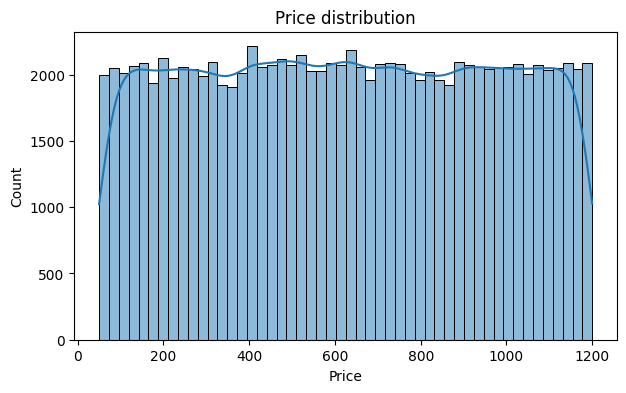

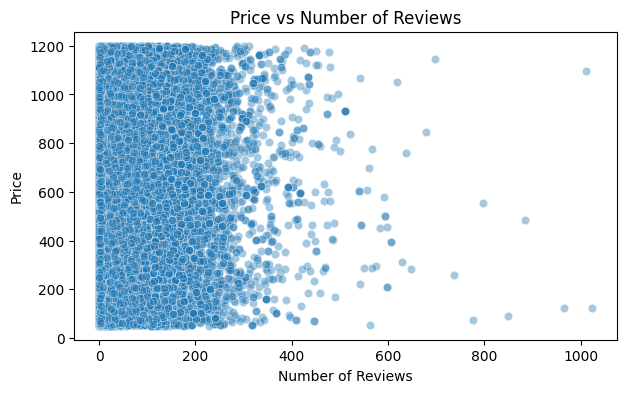

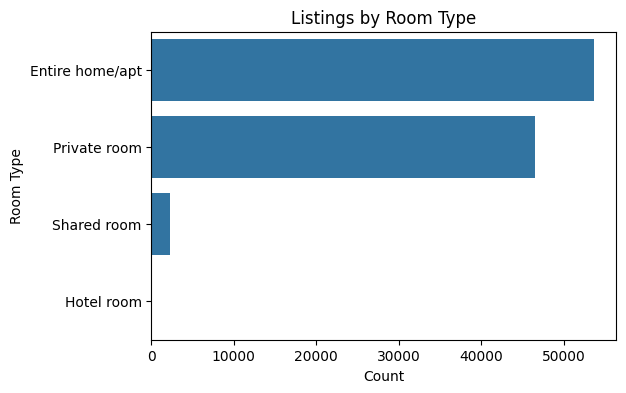

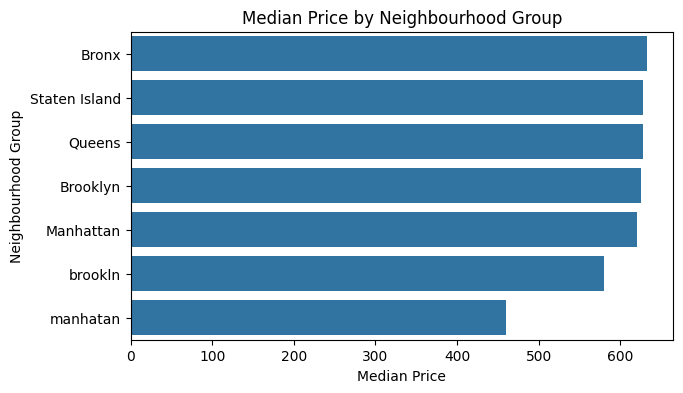

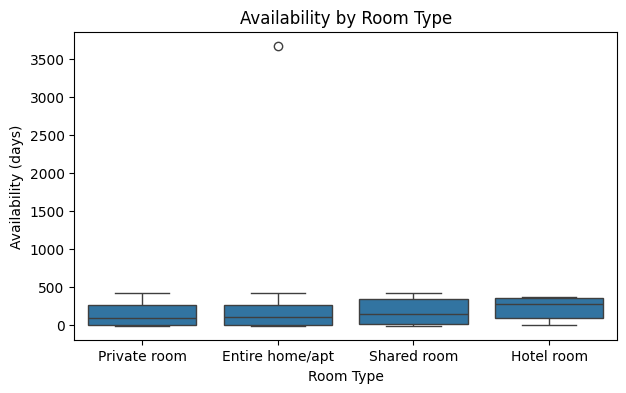

Generated five key visualizations


In [3]:
# Visualization 1: Distribution of price
plt.figure(figsize=(7,4))
sns.histplot(df['price'].dropna(), bins=50, kde=True)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Visualization 2: Reviews vs Price scatter
plt.figure(figsize=(7,4))
sns.scatterplot(x='number_of_reviews', y='price', data=df, alpha=0.4)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

# Visualization 3: Room type counts
if 'room_type' in df.columns:
    plt.figure(figsize=(6,4))
    order = df['room_type'].value_counts().index[:10]
    sns.countplot(y='room_type', data=df, order=order)
    plt.title('Listings by Room Type')
    plt.xlabel('Count')
    plt.ylabel('Room Type')
    plt.show()

# Visualization 4: Average price by neighbourhood group
if 'neighbourhood_group' in df.columns:
    plt.figure(figsize=(7,4))
    ng = df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False)[:15]
    sns.barplot(x=ng.values, y=ng.index)
    plt.title('Median Price by Neighbourhood Group')
    plt.xlabel('Median Price')
    plt.ylabel('Neighbourhood Group')
    plt.show()

# Visualization 5: Availability vs price (box by room type)
if 'room_type' in df.columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='room_type', y='availability_365', data=df)
    plt.title('Availability by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Availability (days)')
    plt.show()

print('Generated five key visualizations')